# Quick Overview of permpy

In [1]:
import matplotlib.pyplot as plt
import permpy as pp
%matplotlib inline

## Permutations can be initialized in a variety of ways:

In [2]:
pp.Permutation([4,1,3,2])

4 1 3 2

In [3]:
pp.Permutation.random(20)

1 4 6 17 10 5 8 7 2 16 14 15 20 19 12 11 9 13 18 3

In [4]:
pp.Permutation([-4,10, 33, 0.3815, -20])

2 4 5 3 1

In [5]:
pp.Permutation(346927815)

3 4 6 9 2 7 8 1 5

## And can be viewed in oneline notation, cycle notation, or plotted:

In [6]:
p = pp.Permutation(346927815)

In [7]:
pp.Permutation.change_repr('cycle'); print(p)
pp.Permutation.change_repr('oneline'); print(p)

( 8 1 3 6 7 ) ( 9 5 2 4 )
3 4 6 9 2 7 8 1 5


By default, uses matplotlib for plotting (arguments are passed to the matplotlib axes)

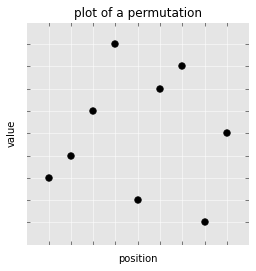

In [8]:
p.plot(title='plot of a permutation', xlabel='position', ylabel='value')

You can plot as ascii art if you don't want to use matplotlib

In [9]:
p.plot(use_mpl=False) 

      *          
            *    
          *      
    *            
                *
  *              
*                
        *        
              *  


## Supports a variety of permutation operations:

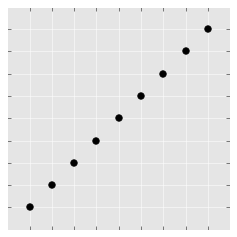

In [10]:
q = p.inverse()
(p * q).plot()

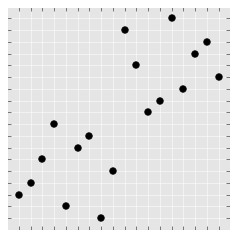

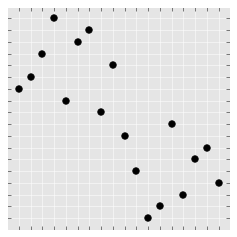

In [11]:
# compute the direct sum and skew sum
(p + q).plot(); (p - q).plot()

In [12]:
p ** p.order()

1 2 3 4 5 6 7 8 9

In [13]:
(p ** 20)

1 2 3 4 5 6 7 8 9

## A wide variety of permutation statistics are built in, and the object is easily extensible

A few examples:

In [14]:
[p.num_ascents(), p.inversions(), p.fixed_points(), p.longestrun(), p.majorindex(), p.num_cycles()]

[6, 17, 0, 4, 11, 2]

A few more

In [15]:
[p.num_cycles(), p.num_peaks(), p.num_ltrmin(), p.num_bonds(), p.num_bonds(), p.num_valleys()]

[2, 2, 3, 2, 2, 2]

## Much of the functionality is geared towards permutation patterns, particularly in enumerating avoidance classes and counting pattern occurrences

Calculate the number of permutations avoiding the pattern 132:

In [16]:
p = pp.Permutation(132)
C = pp.AvClass([p], length = 10)
C

[Set of 0 permutations,
 Set of 1 permutations,
 Set of 2 permutations,
 Set of 5 permutations,
 Set of 14 permutations,
 Set of 42 permutations,
 Set of 132 permutations,
 Set of 429 permutations,
 Set of 1430 permutations,
 Set of 4862 permutations,
 Set of 16796 permutations]

Calculate the total number of inversions in length 4 permutations of the class

In [17]:
C[4].total_statistic(pp.Permutation.inversions)

47

Plot a random length 10 permutation from the class:

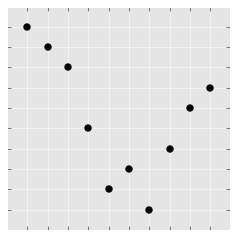

In [18]:
C[10].get_random().plot()

### Can also plot a heatmap, which helps to visualize an _average_ permutation within any set of permutations

Darker areas indicate areas where entries are more common throughout the class. The bigger the class, the more accurate the visualization.

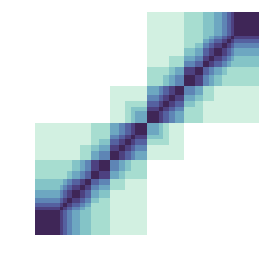

In [19]:
basis = [pp.Permutation(21)]
C = pp.AvClass(basis, length=9)
C.heatmap()

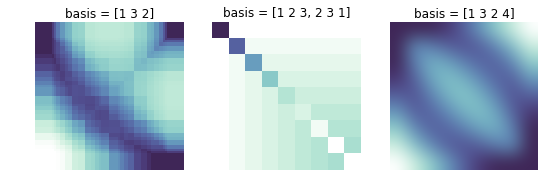

In [20]:
fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(131)
basis = [pp.Permutation(132)]
C = pp.AvClass(basis, length=9)
C.heatmap(ax=ax, title='basis = {}'.format(basis))

ax = fig.add_subplot(132)
basis = [pp.Permutation(123), pp.Permutation(231)]
C = pp.AvClass(basis, length=9)
C.heatmap(ax=ax, only_length=9, title='basis = {}'.format(basis))

ax = fig.add_subplot(133)
basis = [pp.Permutation(1324)]
C = pp.AvClass(basis, length=9)
C.heatmap(ax=ax, only_length=9, blur=True, title='basis = {}'.format(basis))